STOCK TECHNICAL ANALYZER
Data directory: d:\Vscode\stock-analysis-tool\data\cleaned
找到 2 只股票数据
Loading: 00700.HK_cleaned.csv

Calculating technical indicators...
  Added MA5
  Added MA10
  Added MA20
  Added MA50
  Added MA100
  Added RSI_14
  Added MACD (fast=12, slow=26, signal=9)
  Added Bollinger Bands (period=20, std=2)
  Added volume indicators (period=20)
  Added support/resistance levels (window=20)
✓ All technical indicators calculated


C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JOY的电脑\AppData\Local\Temp\ipykernel_12048\3967032417.py:102: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEO

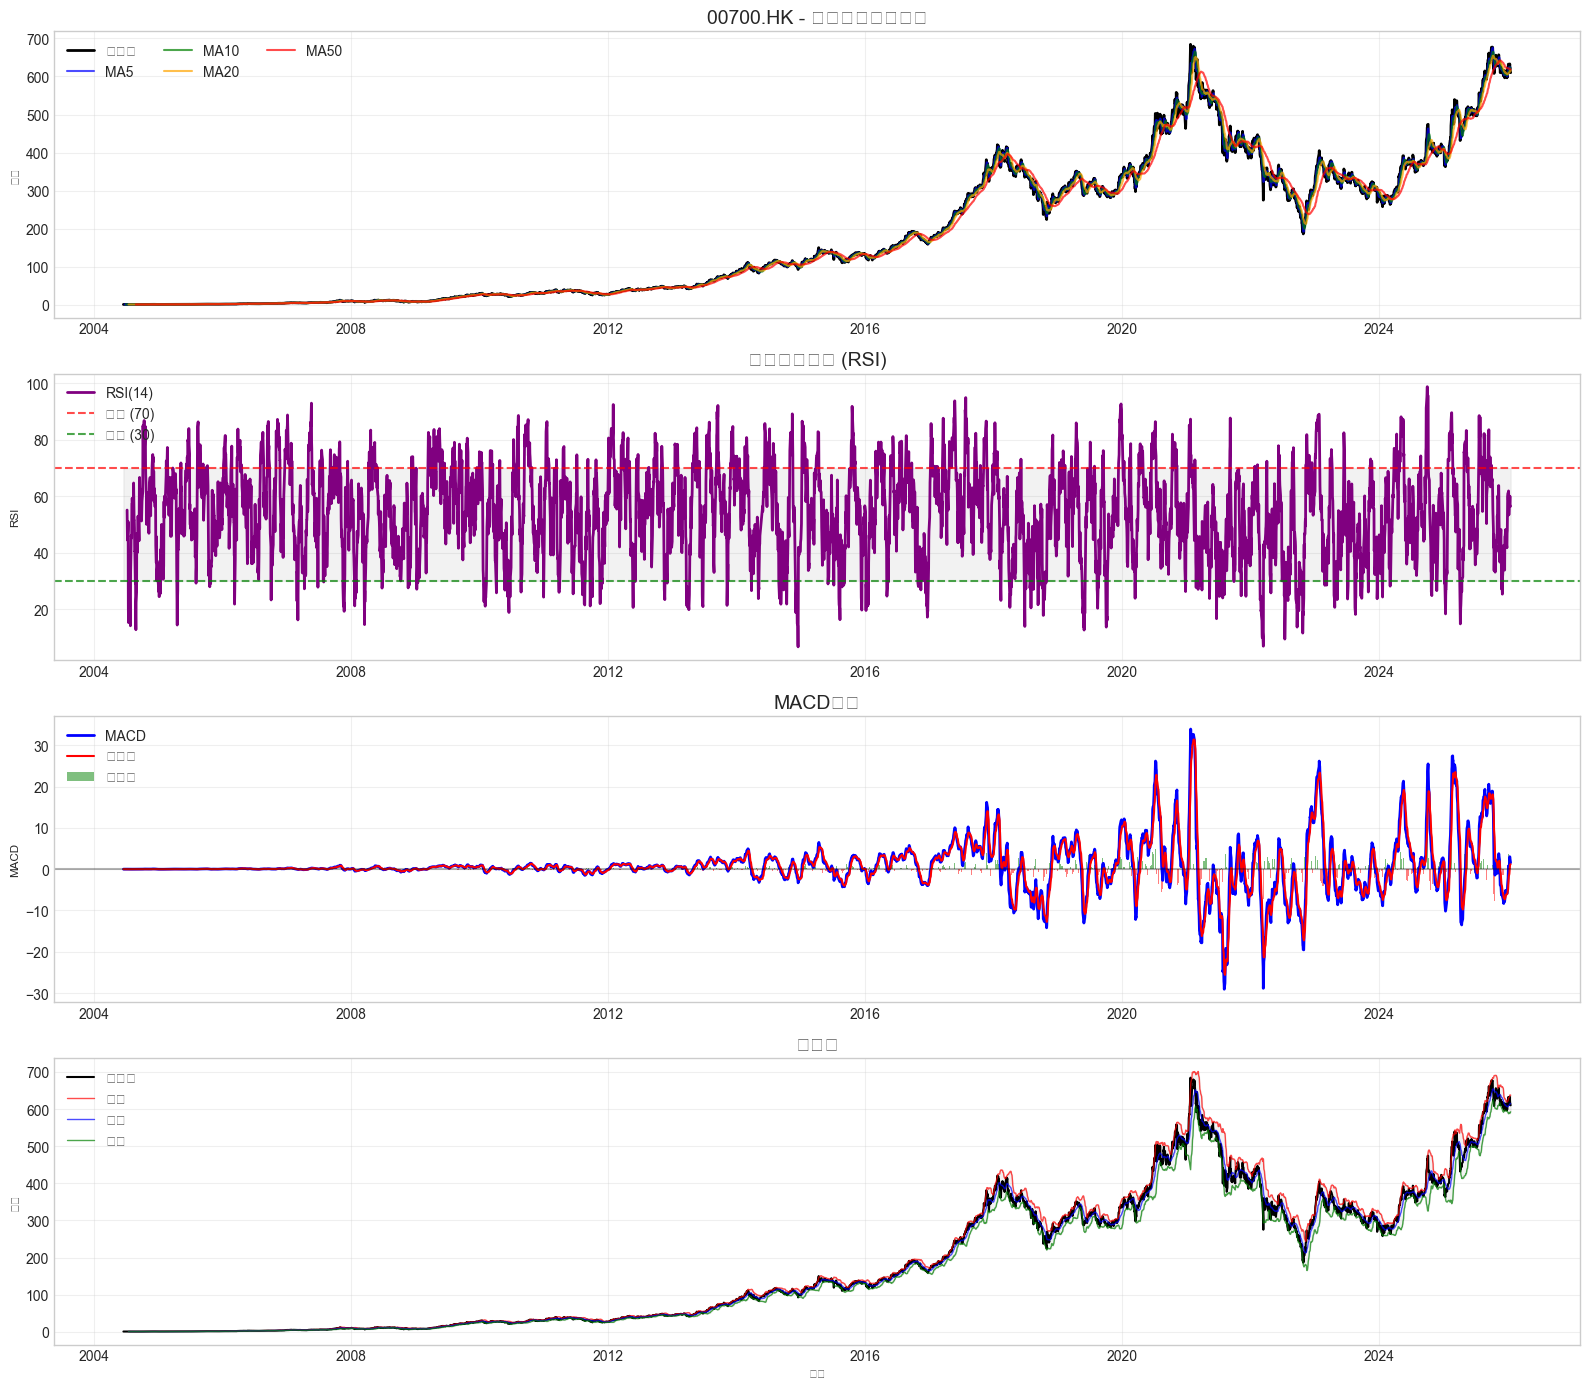

In [1]:
# %% [markdown]
# # 📈 股票技术分析深度演示
# 
# 这个Notebook专门演示技术分析功能

# %%
# 导入和设置
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path.cwd().parent
sys.path.append(str(project_root))

# 导入项目模块
from src.analyzer import StockAnalyzer

# 设置样式
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# %%
# 加载数据演示
analyzer = StockAnalyzer()
cleaned_files = list(analyzer.cleaned_dir.glob("*_cleaned.csv"))

print(f"找到 {len(cleaned_files)} 只股票数据")

# %%
# 技术指标深度分析
if cleaned_files:
    ticker = cleaned_files[0].stem.replace('_cleaned', '')
    df = analyzer.load_cleaned_data(ticker)
    
    # 计算所有技术指标
    df = analyzer.calculate_all_indicators(df)
    
    # 创建技术分析仪表板
    fig = plt.figure(figsize=(16, 14))
    
    # 价格和移动平均线
    ax1 = plt.subplot(4, 1, 1)
    ax1.plot(df.index, df['close'], label='收盘价', linewidth=2, color='black')
    
    ma_colors = ['blue', 'green', 'orange', 'red']
    ma_columns = [col for col in df.columns if col.startswith('MA')][:4]
    
    for i, ma_col in enumerate(ma_columns):
        ax1.plot(df.index, df[ma_col], label=ma_col, linewidth=1.5, 
                alpha=0.7, color=ma_colors[i])
    
    ax1.set_title(f'{ticker} - 价格和移动平均线', fontsize=14)
    ax1.set_ylabel('价格')
    ax1.legend(loc='upper left', ncol=3)
    ax1.grid(True, alpha=0.3)
    
    # RSI指标
    ax2 = plt.subplot(4, 1, 2)
    if 'RSI_14' in df.columns:
        ax2.plot(df.index, df['RSI_14'], label='RSI(14)', linewidth=2, color='purple')
        ax2.fill_between(df.index, 30, 70, alpha=0.1, color='gray')
        ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='超买 (70)')
        ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='超卖 (30)')
        ax2.set_title('相对强弱指数 (RSI)', fontsize=14)
        ax2.set_ylabel('RSI')
        ax2.legend(loc='upper left')
        ax2.grid(True, alpha=0.3)
    
    # MACD指标
    ax3 = plt.subplot(4, 1, 3)
    if 'MACD' in df.columns and 'MACD_Signal' in df.columns:
        ax3.plot(df.index, df['MACD'], label='MACD', linewidth=2, color='blue')
        ax3.plot(df.index, df['MACD_Signal'], label='信号线', linewidth=1.5, color='red')
        
        # MACD柱状图
        colors = ['green' if x >= 0 else 'red' for x in df['MACD_Histogram']]
        ax3.bar(df.index, df['MACD_Histogram'], color=colors, alpha=0.5, label='柱状图')
        
        ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax3.set_title('MACD指标', fontsize=14)
        ax3.set_ylabel('MACD')
        ax3.legend(loc='upper left')
        ax3.grid(True, alpha=0.3)
    
    # 布林带
    ax4 = plt.subplot(4, 1, 4)
    if all(col in df.columns for col in ['BB_Upper', 'BB_Middle', 'BB_Lower']):
        ax4.plot(df.index, df['close'], label='收盘价', linewidth=1.5, color='black')
        ax4.plot(df.index, df['BB_Upper'], label='上轨', linewidth=1, color='red', alpha=0.7)
        ax4.plot(df.index, df['BB_Middle'], label='中轨', linewidth=1, color='blue', alpha=0.7)
        ax4.plot(df.index, df['BB_Lower'], label='下轨', linewidth=1, color='green', alpha=0.7)
        ax4.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], alpha=0.1, color='gray')
        ax4.set_title('布林带', fontsize=14)
        ax4.set_ylabel('价格')
        ax4.set_xlabel('日期')
        ax4.legend(loc='upper left')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()